In [27]:
#import libraries
import sqlite3
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

#### Get data from database

In [5]:
conn =  sqlite3.connect('inventory_data.db')

In [9]:
df=pd.read_sql("""SELECT * from VendorSalesSummary""", conn)
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,Volume,ActualPrice,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesDollars,TotalSalesPrice,TotalSalesQuantity,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,1750.0,36.99,145080,3811251.60,344712.22,64889.97,9578.0,17598.14,68601.68,-3466539.38,-1005.632867,0.066019,0.090446
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,1750.0,28.99,164038,3804041.22,275162.97,52289.50,9203.0,16909.12,144929.24,-3528878.25,-1282.468440,0.056103,0.072334
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,1750.0,24.99,187407,3418303.68,288135.11,48202.30,11189.0,20557.97,123780.22,-3130168.57,-1086.354443,0.059704,0.084292
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,1750.0,22.99,201682,3261197.94,444810.74,43304.31,20226.0,37163.76,257032.07,-2816387.20,-633.165287,0.100287,0.136395
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,1750.0,29.99,138109,3023206.01,357759.17,52774.51,11883.0,21833.58,257032.07,-2665446.84,-745.039419,0.086041,0.118338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,750.0,4.99,2,2.64,5.97,5.97,3.0,0.33,27100.41,3.33,55.778894,1.500000,2.261364
10688,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,50.0,0.49,6,2.34,62.72,0.98,128.0,6.72,50293.62,60.38,96.269133,21.333333,26.803419
10689,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,50.0,0.99,2,1.48,0.00,0.00,0.0,0.00,14069.87,-1.48,-inf,0.000000,0.000000
10690,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,200.0,1.99,1,1.47,11.94,7.96,6.0,1.26,257032.07,10.47,87.688442,6.000000,8.122449


### Exploratory Data Analysis

In this step, we will be analysing the VendorSalesSummary to get key insights for Supplier Performance Optimization.

In [24]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,NaN,NaN,NaN,10650.649458,18753.519148,2.0,3951.0,7153.0,9552.0,201359.0
VendorName,10692,129,MARTIGNETTI COMPANIES,1382,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Brand,10692.0,NaN,NaN,NaN,18039.228769,12662.187074,58.0,5793.5,18761.5,25514.25,90631.0
Description,10692,9651,Southern Comfort,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PurchasePrice,10692.0,NaN,NaN,NaN,24.385303,109.269375,0.36,6.84,10.455,19.4825,5681.81
Volume,10692.0,NaN,NaN,NaN,847.36055,664.309212,50.0,750.0,750.0,750.0,20000.0
ActualPrice,10692.0,NaN,NaN,NaN,35.643671,148.246016,0.49,10.99,15.99,28.99,7499.99
TotalPurchaseQuantity,10692.0,NaN,NaN,NaN,3140.886831,11095.086769,1.0,36.0,262.0,1975.75,337660.0
TotalPurchaseDollars,10692.0,NaN,NaN,NaN,30106.693372,123067.799627,0.71,453.4575,3655.465,20738.245,3811251.6
TotalSalesDollars,10692.0,NaN,NaN,NaN,3089.647773,12181.138259,0.0,0.0,251.74,2089.5525,444810.74


### Checking for Outliers

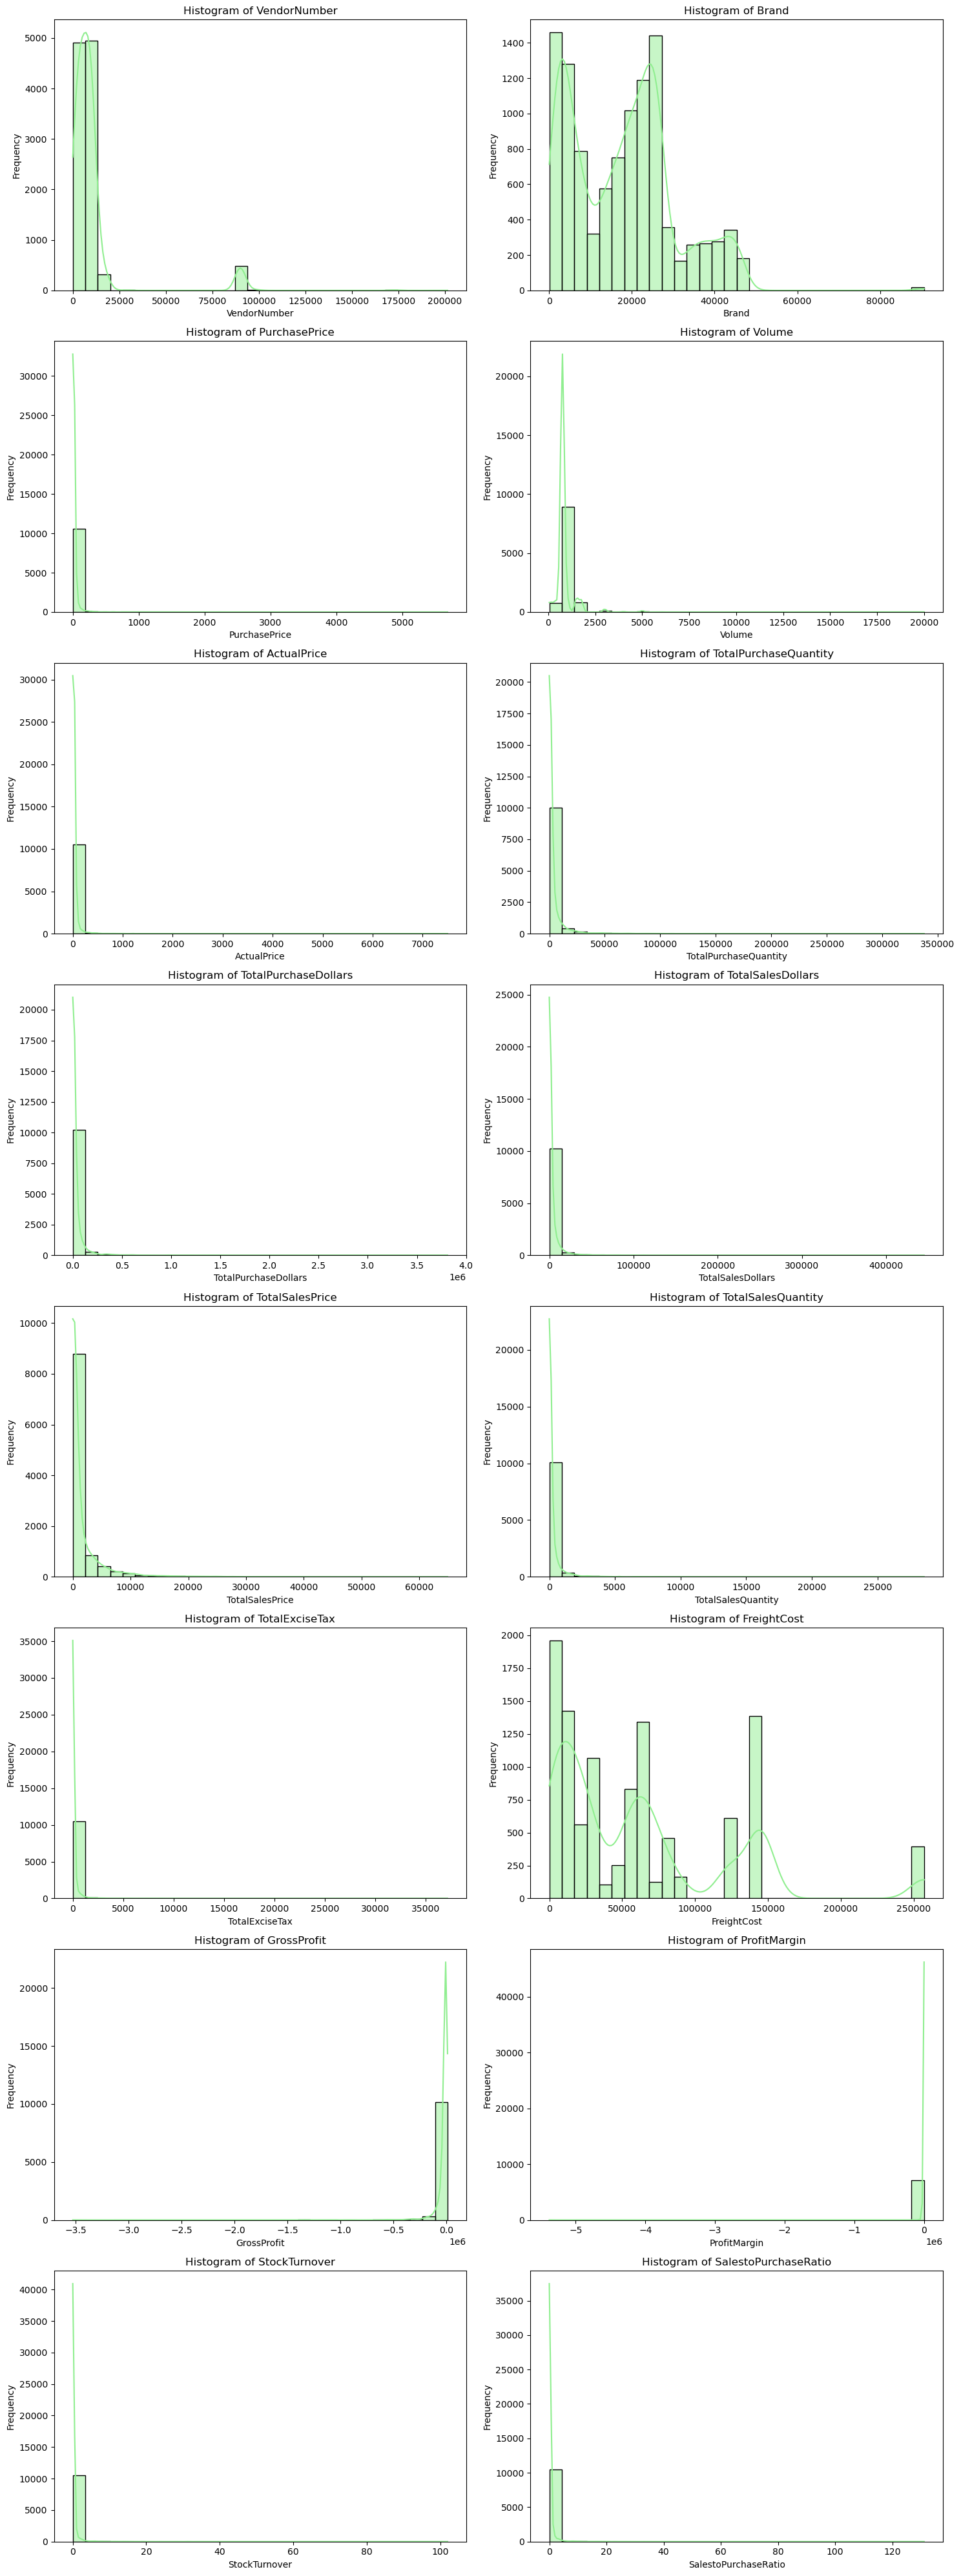

In [32]:
# Select only numerical columns
num_cols = df.select_dtypes(include=np.number).columns

# Create subplots (2 per row)
n = len(num_cols)
rows = (n // 2) + (n % 2 > 0)
fig, axes = plt.subplots(rows, 2, figsize=(15, 5*rows))
axes = axes.flatten()

# Plot histograms with KDE side by side
for i, col in enumerate(num_cols):
    sns.histplot(df[col].dropna(), bins=30, kde=True, ax=axes[i],
                 color="lightgreen", edgecolor="black")
    axes[i].set_title(f"Histogram of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")
    
# Remove any empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

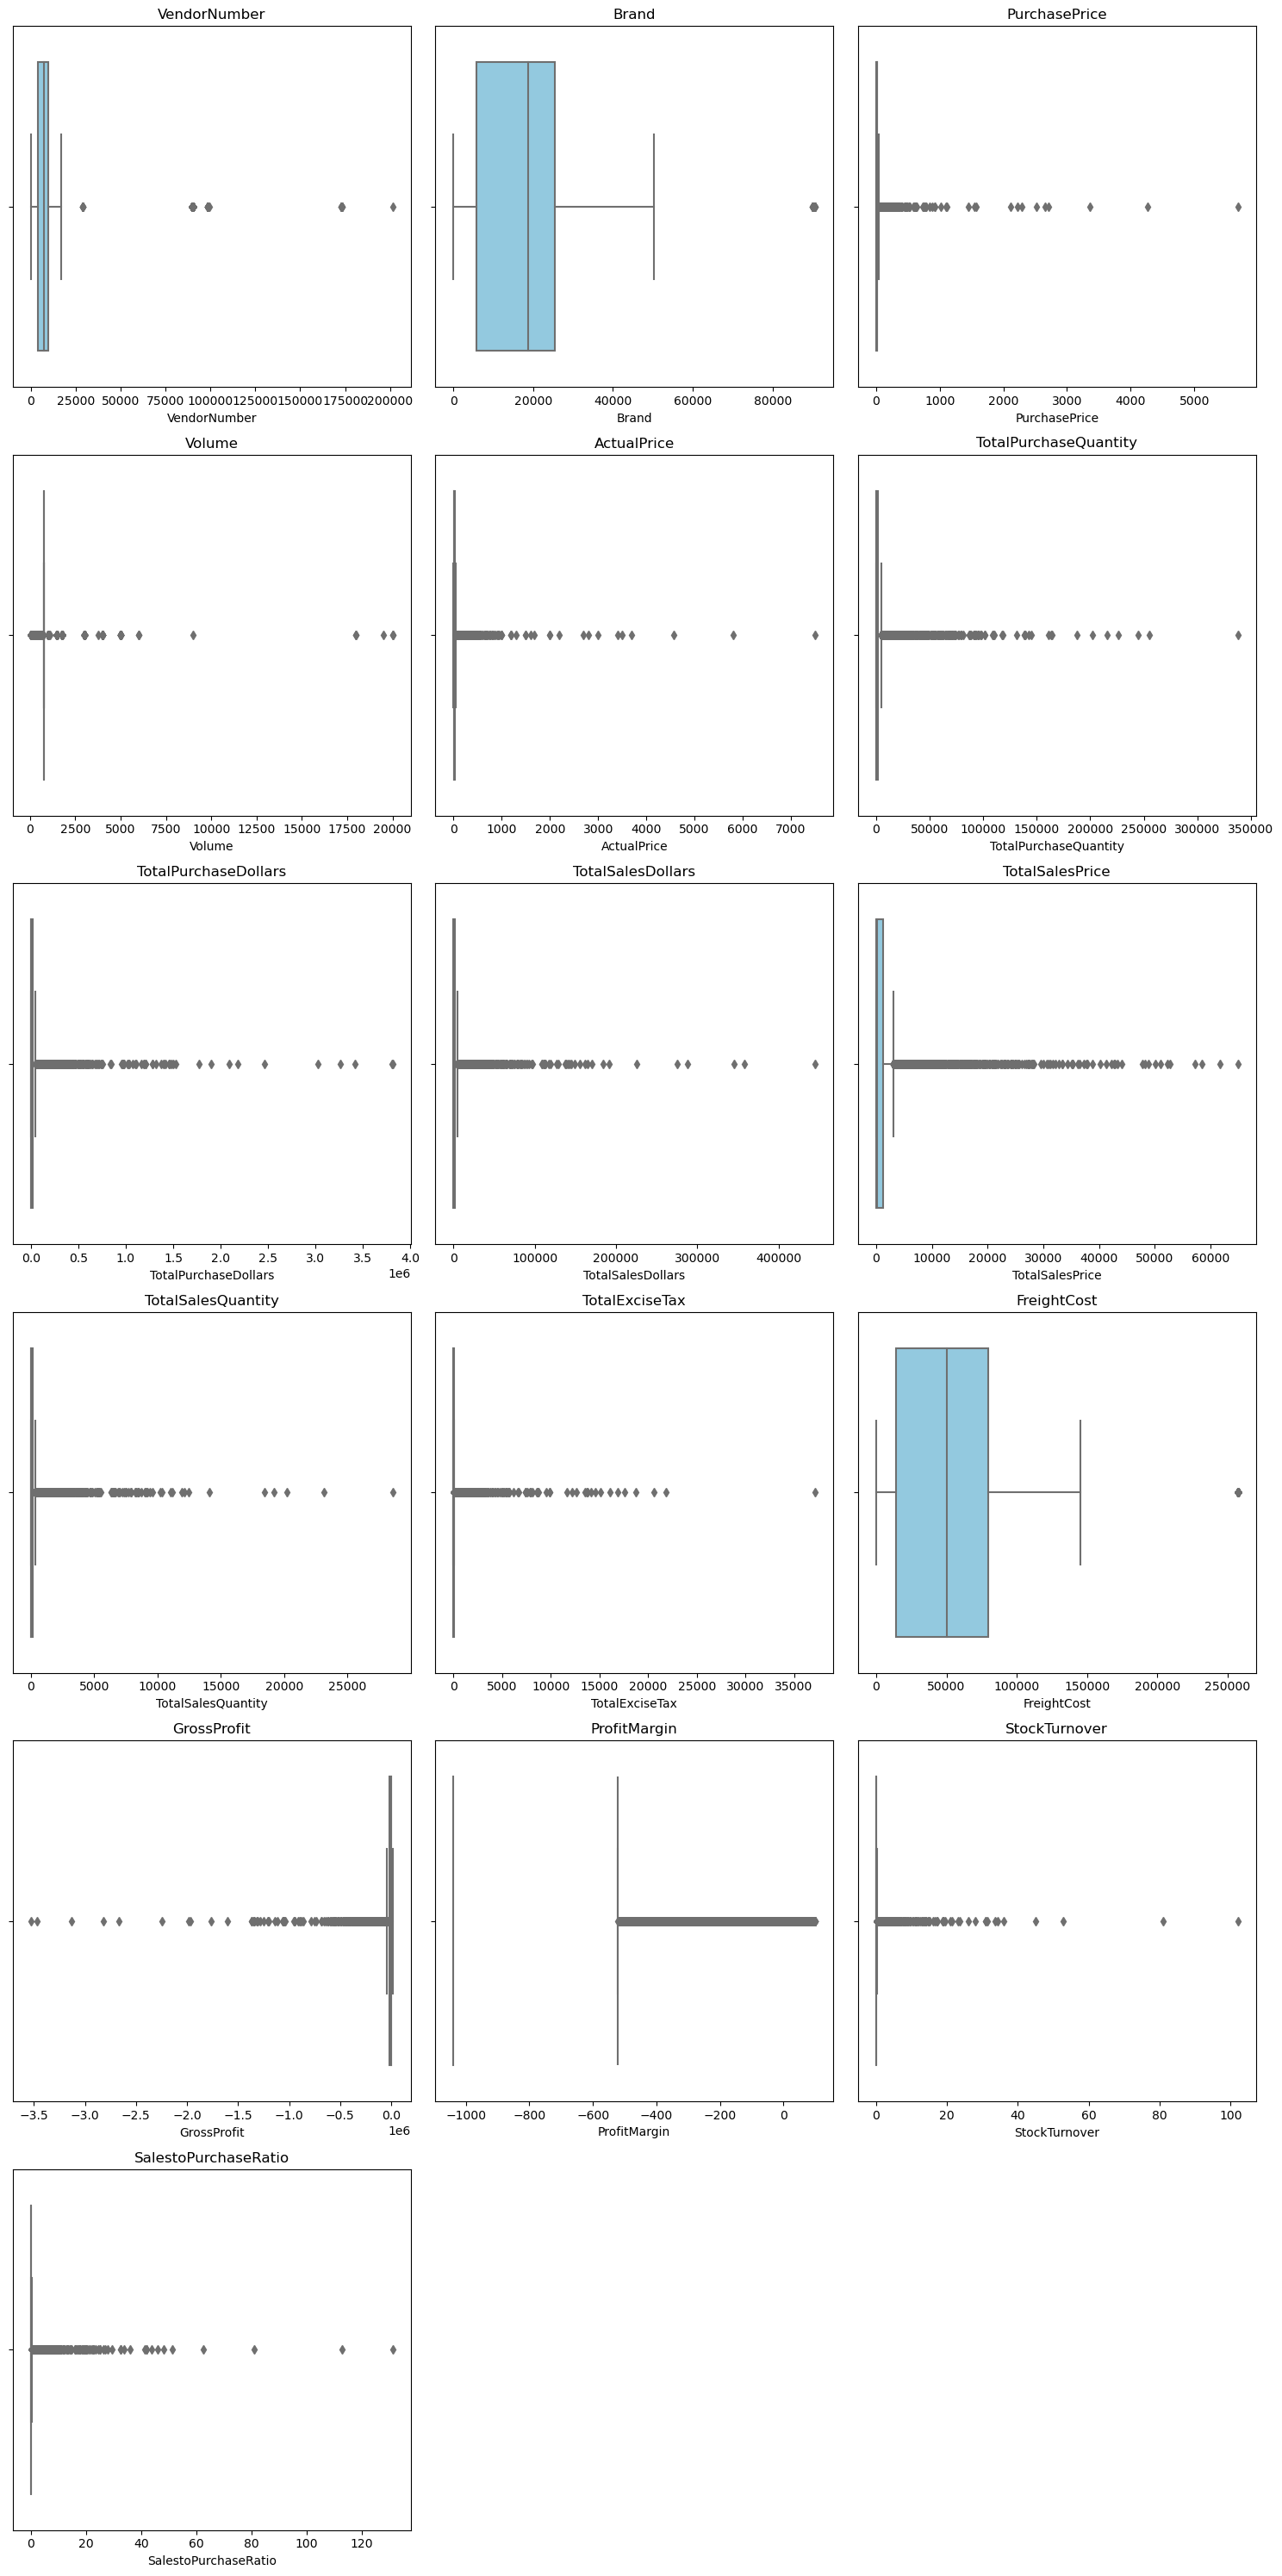

In [35]:
#Boxplot
n = len(num_cols)
rows = (n // 3) + (n % 3 > 0)
fig, axes = plt.subplots(rows, 3, figsize=(15, 5*rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], ax=axes[i], color="skyblue")
    axes[i].set_title(col)

# Remove unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [117]:
#Filtering data 
df=pd.read_sql("""SELECT * from VendorSalesSummary WHERE TotalSalesQuantity > 0 """, conn)

In [155]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,Volume,ActualPrice,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesDollars,...,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio,UnitPurchasePrice,QuantityBin,VolumeCat,PurchaseVolumeCategory
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,1750.0,36.99,145080,3811251.60,344712.22,...,17598.14,68601.68,-3466539.38,-1005.632867,0.066019,0.090446,26.27,"(18475.85, 337660.0]",Large,Large
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,1750.0,28.99,164038,3804041.22,275162.97,...,16909.12,144929.24,-3528878.25,-1282.468440,0.056103,0.072334,23.19,"(18475.85, 337660.0]",Large,Large
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,1750.0,24.99,187407,3418303.68,288135.11,...,20557.97,123780.22,-3130168.57,-1086.354443,0.059704,0.084292,18.24,"(18475.85, 337660.0]",Large,Large
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,1750.0,22.99,201682,3261197.94,444810.74,...,37163.76,257032.07,-2816387.20,-633.165287,0.100287,0.136395,16.17,"(18475.85, 337660.0]",Large,Large
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,1750.0,29.99,138109,3023206.01,357759.17,...,21833.58,257032.07,-2665446.84,-745.039419,0.086041,0.118338,21.89,"(18475.85, 337660.0]",Large,Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7139,3960,DIAGEO NORTH AMERICA INC,2626,Crown Royal Apple,1.42,50.0,1.99,2,2.84,23.88,...,0.63,257032.07,21.04,88.107203,6.000000,8.408451,1.42,"(0.999, 8.0]",Small,Small
7140,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,750.0,4.99,2,2.64,5.97,...,0.33,27100.41,3.33,55.778894,1.500000,2.261364,1.32,"(0.999, 8.0]",Small,Small
7141,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,50.0,0.49,6,2.34,62.72,...,6.72,50293.62,60.38,96.269133,21.333333,26.803419,0.39,"(0.999, 8.0]",Small,Small
7142,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,200.0,1.99,1,1.47,11.94,...,1.26,257032.07,10.47,87.688442,6.000000,8.122449,1.47,"(0.999, 8.0]",Small,Small


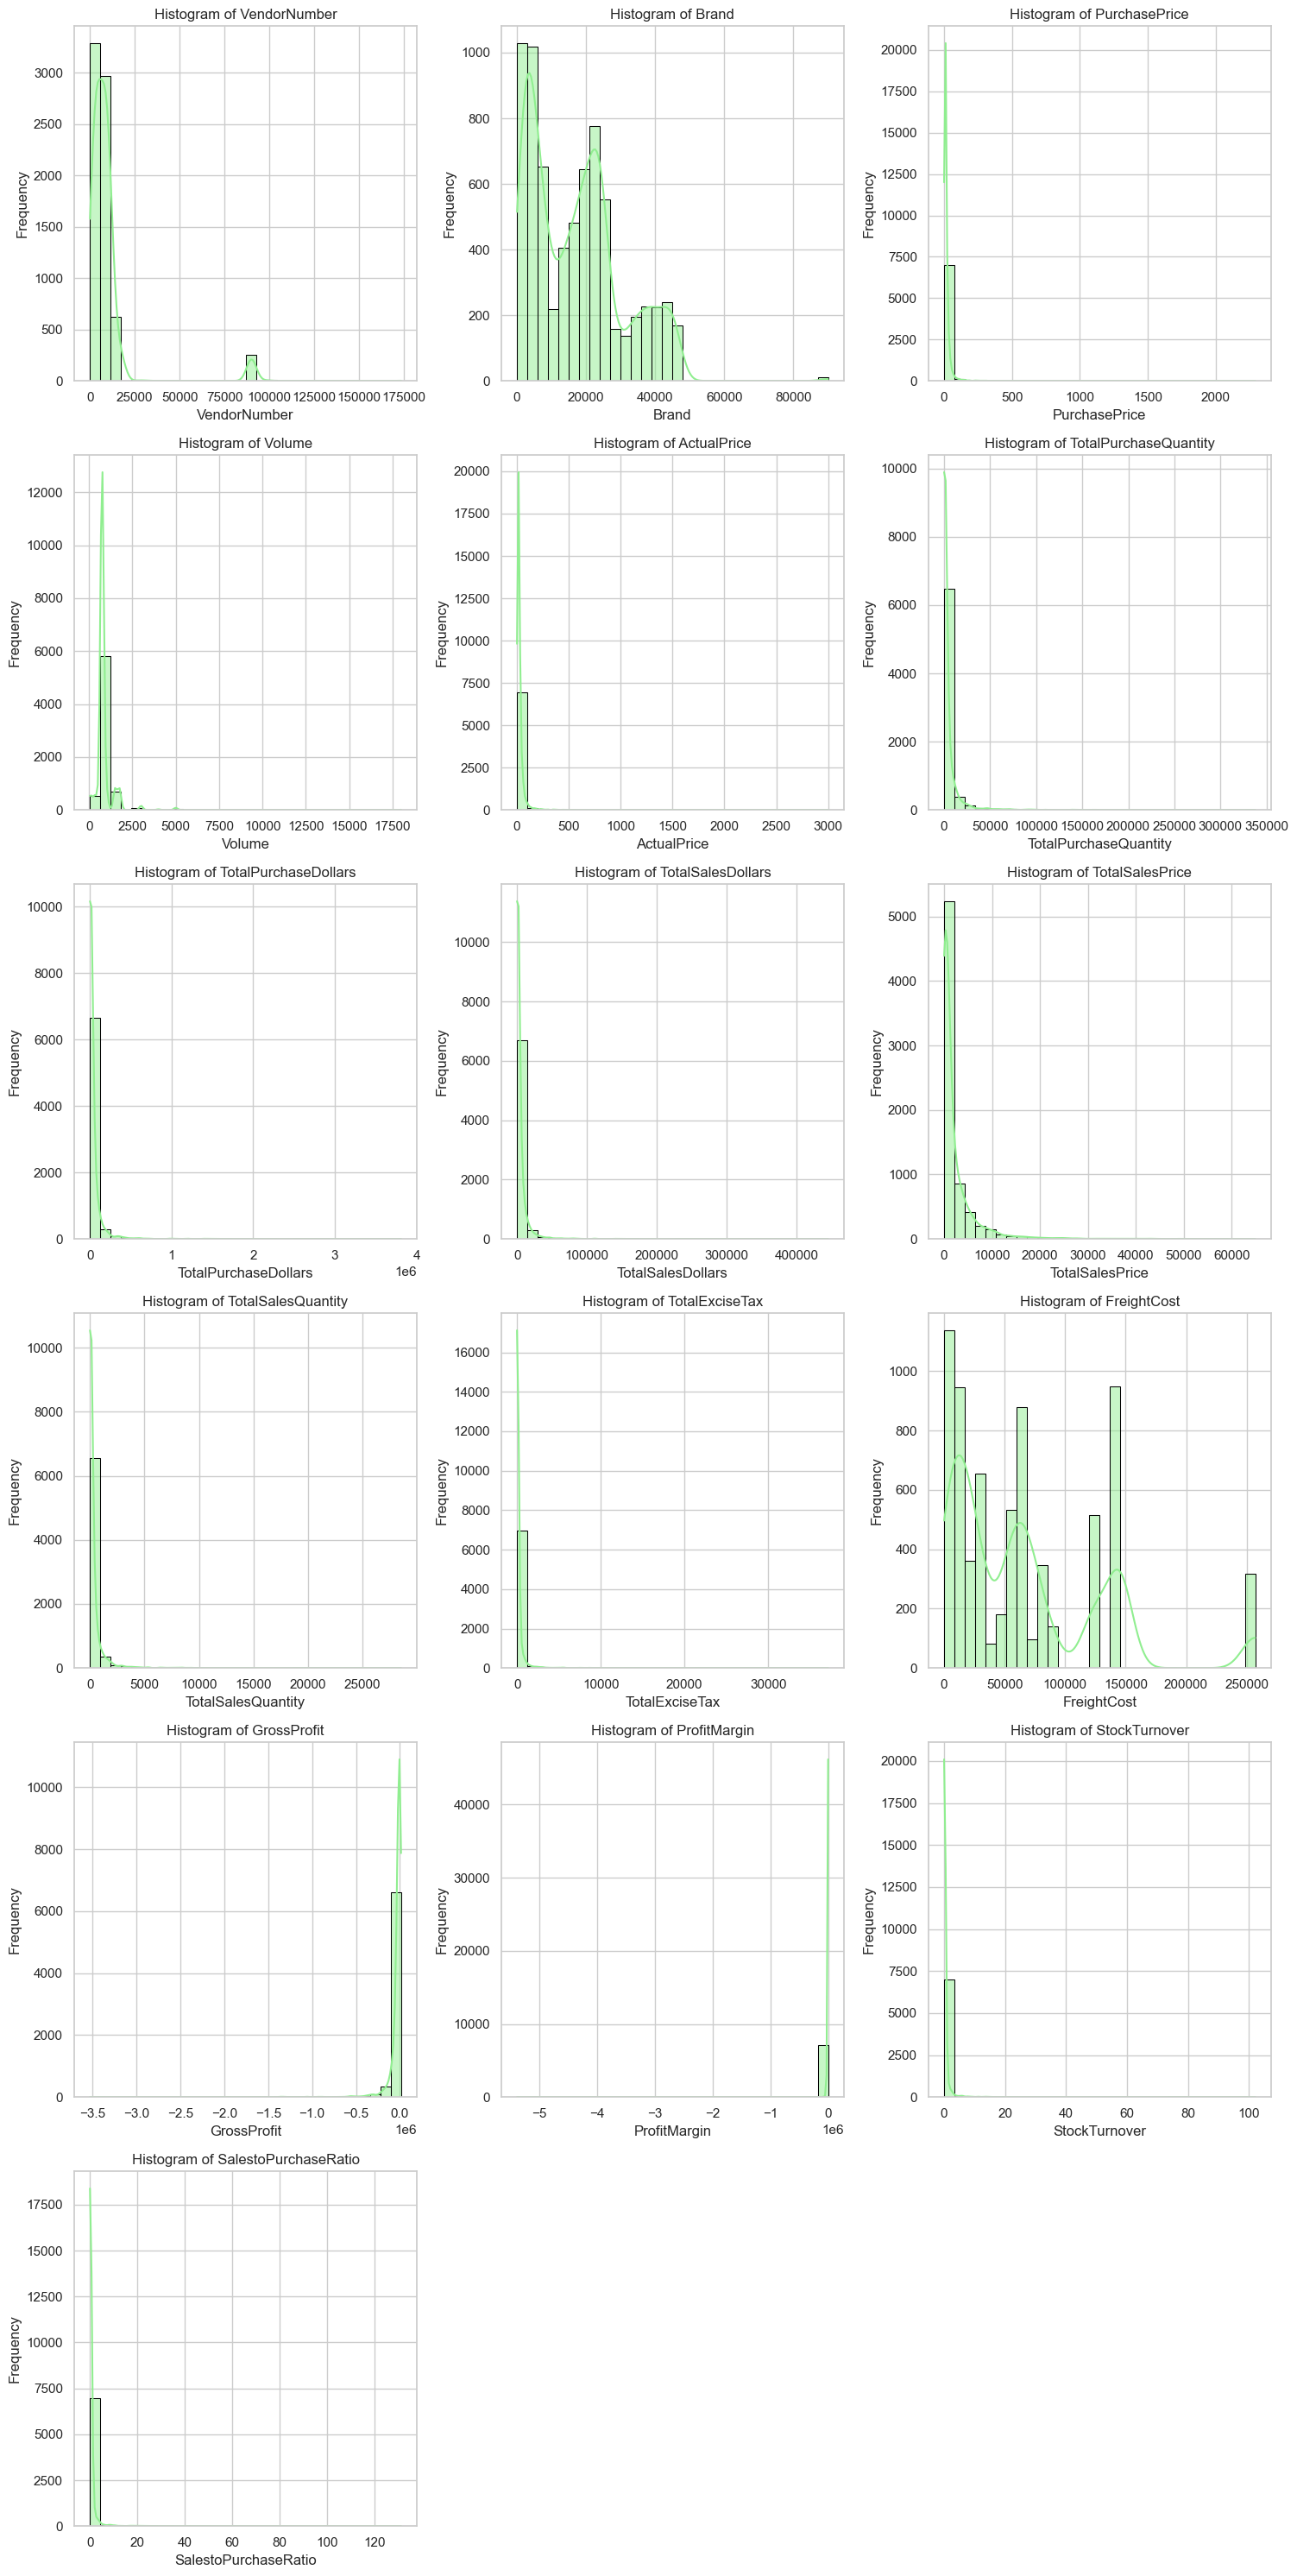

In [119]:
# Select only numerical columns
num_cols = df.select_dtypes(include=np.number).columns

# Create subplots (3 per row)
n = len(num_cols)
rows = (n // 3) + (n % 3 > 0)
fig, axes = plt.subplots(rows, 3, figsize=(15, 5*rows))
axes = axes.flatten()

# Plot histograms with KDE side by side
for i, col in enumerate(num_cols):
    sns.histplot(df[col].dropna(), bins=30, kde=True, ax=axes[i],
                 color="lightgreen", edgecolor="black")
    axes[i].set_title(f"Histogram of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")
    
# Remove any empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

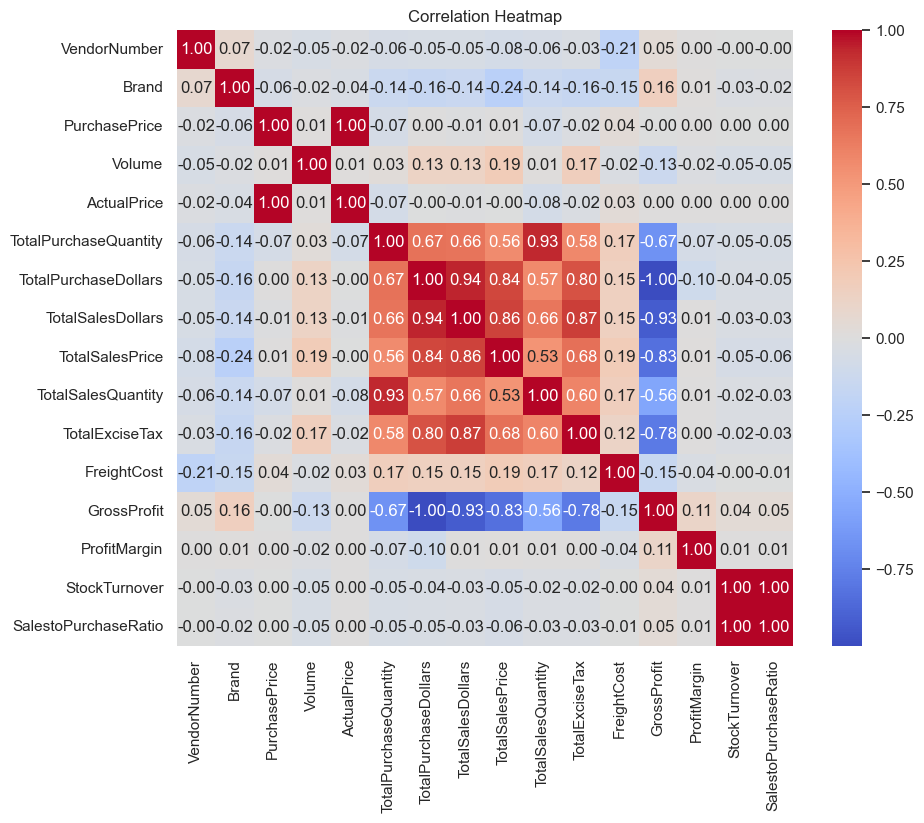

In [120]:
# Compute correlation matrix (numeric columns only)
corr = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)

plt.title("Correlation Heatmap", fontsize=12)
plt.show()

#### Observation:
1. Purchase price has almost no influence on overall sales revenue — meaning higher or lower purchase costs don’t directly drive sales dollars.
2. As purchase prices increase, gross profit tends to decline slightly, showing cost inflation erodes profitability, even though it doesn’t impact sales revenue.
3. Higher purchase quantities are moderately linked to higher sales quantities, but the relationship is not very strong — meaning buying more doesn’t always translate proportionally into higher sales.
4. Profit margin does not depend on total sales dollars — selling more in terms of revenue does not guarantee better (or worse) margins.
5. Inventory turnover has almost no impact on gross profit.

#### Identity brands that need promotions or discounts based on lower sales but high profit margin

In [121]:
#Aggregate at Brand level
brand_summary = df.groupby("Brand").agg({
    "TotalSalesQuantity": "sum",
    "TotalSalesDollars": "sum",
    "GrossProfit": "sum",
    "ProfitMargin": "mean"   
}).reset_index()

brand_summary

,Brand,TotalSalesQuantity,TotalSalesDollars,GrossProfit,ProfitMargin
0,58,288.0,3741.12,-29202.88,-780.591908
1,60,124.0,1358.76,-10725.44,-789.355000
2,61,24.0,335.76,-2971.44,-884.989278
3,62,162.0,6552.38,-85191.62,-1300.162994
4,63,131.0,5552.69,-81410.61,-1466.147219
...,...,...,...,...,...
7139,90080,19.0,1139.81,817.73,71.742659
7140,90085,2.0,73.98,-116.90,-158.015680
7141,90086,1.0,51.99,17.79,34.218119
7142,90087,1.0,469.99,-4198.76,-893.372199


In [122]:
#Define threshold for "low sales but high margin"
low_sales_threshold = brand_summary["TotalSalesQuantity"].quantile(0.15)  
high_margin_threshold = brand_summary["ProfitMargin"].quantile(0.80)     

In [123]:
#Filter brands that meet the criteria
promo_candidates = brand_summary[
    (brand_summary["TotalSalesQuantity"] <= low_sales_threshold) &
    (brand_summary["ProfitMargin"] >= high_margin_threshold)
]

print("Brands that may need promotions/discounts:")
print(promo_candidates.shape)
display(promo_candidates)

Brands that may need promotions/discounts:
(330, 5)


,Brand,TotalSalesQuantity,TotalSalesDollars,GrossProfit,ProfitMargin
6,75,3.0,44.97,-64.43,-143.273293
9,82,3.0,1124.97,-1110.09,-98.677298
22,122,4.0,43.96,36.00,81.892630
40,189,2.0,14.98,-8.06,-53.805073
82,317,1.0,31.99,-16.47,-51.484839
...,...,...,...,...,...
7036,45993,4.0,43.96,18.00,40.946315
7077,46418,2.0,31.98,-26.04,-81.425891
7111,46765,5.0,274.95,-192.27,-69.929078
7140,90085,2.0,73.98,-116.90,-158.015680


#### Top 5 vendors showing high sales in terms of dollars

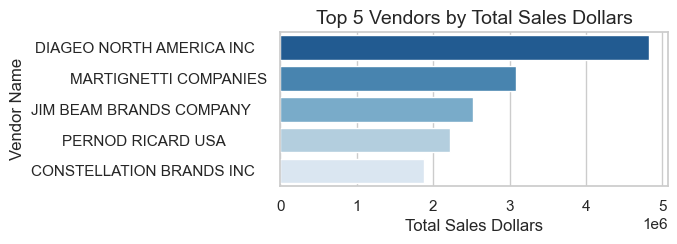

In [132]:
top_vendors = df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(5)
# Plot
plt.figure(figsize=(5,2))
sns.barplot(x=top_vendors.values, y=top_vendors.index, palette="Blues_r")

plt.title("Top 5 Vendors by Total Sales Dollars", fontsize=14)
plt.xlabel("Total Sales Dollars")
plt.ylabel("Vendor Name")
plt.show()

In [133]:
top_vendors

VendorName
DIAGEO NORTH AMERICA INC       4831666.43
MARTIGNETTI COMPANIES          3086438.23
JIM BEAM BRANDS COMPANY        2516806.65
PERNOD RICARD USA              2215113.82
CONSTELLATION BRANDS INC       1878159.16
Name: TotalSalesDollars, dtype: float64

#### Does purchasing in bulk reduce the unit price? What is the optimal purchase volume for cost savings?

In [136]:
df['UnitPurchasePrice'] = df['TotalPurchaseDollars'] / df['TotalPurchaseQuantity']

# Correlation between Quantity & Unit Price
corr = df["TotalPurchaseQuantity"].corr(df["UnitPurchasePrice"])
print(f"Correlation: {corr:.2f}")

Correlation: -0.07


The correlation is negative (-0.07), it means higher purchase volumes are associated with lower unit prices (bulk discount).

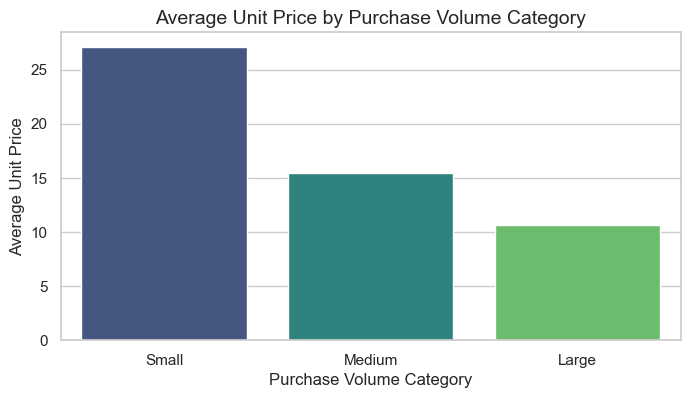

,PurchaseVolumeCategory,TotalPurchaseQuantity,UnitPurchasePrice
0,Small,56.593370,27.107621
1,Medium,841.853361,15.405891
2,Large,12219.695086,10.625628


In [141]:
df["PurchaseVolumeCategory"] = pd.qcut(
    df["TotalPurchaseQuantity"],
    q=3,
    labels=["Small", "Medium", "Large"]
)

# Step 3: Aggregate unit price by category
volume_analysis = df.groupby("PurchaseVolumeCategory").agg({
    "TotalPurchaseQuantity": "mean",
    "UnitPurchasePrice": "mean"
}).reset_index()

# Step 4: Plot
plt.figure(figsize=(8,4))
sns.barplot(
    data=volume_analysis,
    x="PurchaseVolumeCategory", 
    y="UnitPurchasePrice",
    palette="viridis"
)

plt.title("Average Unit Price by Purchase Volume Category", fontsize=14)
plt.xlabel("Purchase Volume Category")
plt.ylabel("Average Unit Price")
plt.show()

volume_analysis

1. Highest unit price at $27.1, indicating poor cost efficiency for low-volume buying.

2. For medium purchases, unit price drops to $15.4, showing ~43% savings compared to small volumes.

3. Large purchases has the lowest unit price at $10.6, offering ~60% savings vs. small purchases and maximizing cost efficiency.
   This confirms a direct volume-to-cost advantage, where larger purchases secure significantly lower unit prices.

#### Which top 10 vendors have low inventory turnover?

In [142]:
# still in stock
df[df['StockTurnover']<1]

,VendorNumber,VendorName,Brand,Description,PurchasePrice,Volume,ActualPrice,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesDollars,...,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio,UnitPurchasePrice,QuantityBin,VolumeCat,PurchaseVolumeCategory
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,1750.0,36.99,145080,3811251.60,344712.22,...,17598.14,68601.68,-3466539.38,-1005.632867,0.066019,0.090446,26.27,"(18475.85, 337660.0]",Large,Large
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,1750.0,28.99,164038,3804041.22,275162.97,...,16909.12,144929.24,-3528878.25,-1282.468440,0.056103,0.072334,23.19,"(18475.85, 337660.0]",Large,Large
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,1750.0,24.99,187407,3418303.68,288135.11,...,20557.97,123780.22,-3130168.57,-1086.354443,0.059704,0.084292,18.24,"(18475.85, 337660.0]",Large,Large
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,1750.0,22.99,201682,3261197.94,444810.74,...,37163.76,257032.07,-2816387.20,-633.165287,0.100287,0.136395,16.17,"(18475.85, 337660.0]",Large,Large
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,1750.0,29.99,138109,3023206.01,357759.17,...,21833.58,257032.07,-2665446.84,-745.039419,0.086041,0.118338,21.89,"(18475.85, 337660.0]",Large,Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7067,12546,JIM BEAM BRANDS COMPANY,189,Leroux Apple Schnapps,5.76,1000.0,7.49,4,23.04,14.98,...,2.10,123880.97,-8.06,-53.805073,0.500000,0.650174,5.76,"(0.999, 8.0]",Small,Small
7072,9165,ULTRA BEVERAGE COMPANY LLP,12354,Mercer Pnt Gris,3.65,750.0,14.99,6,21.90,26.45,...,0.56,68054.70,4.55,17.202268,0.833333,1.207763,3.65,"(0.999, 8.0]",Small,Small
7082,7153,PINE STATE TRADING CO,5818,Tomahawk Maple Cream Liqueur,0.78,50.0,0.99,25,19.50,14.85,...,0.77,15884.82,-4.65,-31.313131,0.600000,0.761538,0.78,"(16.0, 31.0]",Small,Small
7125,7245,PROXIMO SPIRITS INC.,3096,Three Olives Loopy Vodka,0.72,50.0,0.99,10,7.20,8.91,...,0.46,38994.78,1.71,19.191919,0.900000,1.237500,0.72,"(8.0, 16.0]",Small,Small


In [152]:
# Group by Vendor and calculate average stock turnover
df[df['StockTurnover']<1].groupby("VendorName")["StockTurnover"].mean().sort_values().head(10)

VendorName
MANGO BOTTLING INC             0.007681
SWEETWATER FARM                0.026786
CALEDONIA SPIRITS INC          0.033420
TAMWORTH DISTILLING            0.034903
APPOLO VINEYARDS LLC           0.035227
WEIN BAUER INC                 0.035812
BULLY BOY DISTILLERS           0.037507
CENTEUR IMPORTS LLC            0.046484
ALTAMAR BRANDS LLC             0.046875
MAJESTIC FINE WINES            0.048598
Name: StockTurnover, dtype: float64

In [156]:
# Save to CSV
df.to_csv("VendorSalesSummary.csv", index=False)